**Convolutional Neural Network (CNN) — Classifying Handwritten Digits**

importing dependencies

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


Q1. Load & Preprocess the Data


In [17]:
# Transform images to tensors and normalize pixel values to [0,1]
transform = transforms.ToTensor()


In [18]:
# Load training and test data
train_data = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_data = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

In [19]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
 #shuffle=True → Mixes up the data at the beginning of each epoch to help the model learn better
test_loader = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=False)

Q2. Visualize the Data

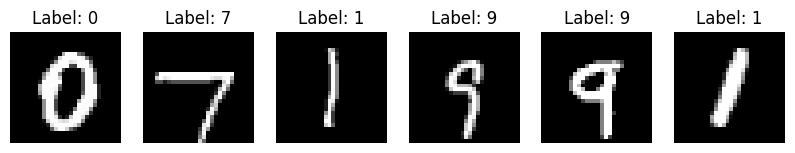

In [20]:
examples = enumerate(train_loader)
batch_idx, (example_data, example_targets) = next(examples)

# Show sample images of one digit
plt.figure(figsize=(10, 4))
for i in range(6):
    plt.subplot(1, 6, i + 1)
    plt.imshow(example_data[i][0], cmap='gray')
    plt.title(f"Label: {example_targets[i].item()}")
    plt.axis('off')
plt.show()


Q3. Build the CNN


In [21]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, padding=1)  # input: 1 channel, output: 16, kernel size: 3
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.fc1 = nn.Linear(32 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)  # 10 output classes

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 32 * 7 * 7)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = CNN()


Q4. Train the Model

In [22]:
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_loss_list = []
test_loss_list = []
train_acc_list = []
test_acc_list = []

for epoch in range(10):
    # Training phase
    model.train()
    running_loss = 0
    correct = 0
    total = 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss_list.append(running_loss / len(train_loader))
    train_acc_list.append(100 * correct / total)

    # Evaluation phase
    model.eval()
    test_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_loss_list.append(test_loss / len(test_loader))
    test_acc_list.append(100 * correct / total)

    print(f"Epoch {epoch+1}: Train Loss = {train_loss_list[-1]:.4f}, Test Loss = {test_loss_list[-1]:.4f}")
    print(f"           Train Accuracy = {train_acc_list[-1]:.2f}%, Test Accuracy = {test_acc_list[-1]:.2f}%")


Epoch 1: Train Loss = 0.2225, Test Loss = 0.0670
           Train Accuracy = 93.25%, Test Accuracy = 97.68%
Epoch 2: Train Loss = 0.0620, Test Loss = 0.0409
           Train Accuracy = 98.13%, Test Accuracy = 98.65%
Epoch 3: Train Loss = 0.0428, Test Loss = 0.0405
           Train Accuracy = 98.71%, Test Accuracy = 98.59%
Epoch 4: Train Loss = 0.0323, Test Loss = 0.0385
           Train Accuracy = 99.00%, Test Accuracy = 98.77%
Epoch 5: Train Loss = 0.0253, Test Loss = 0.0374
           Train Accuracy = 99.21%, Test Accuracy = 98.69%
Epoch 6: Train Loss = 0.0202, Test Loss = 0.0283
           Train Accuracy = 99.35%, Test Accuracy = 99.17%
Epoch 7: Train Loss = 0.0156, Test Loss = 0.0332
           Train Accuracy = 99.47%, Test Accuracy = 98.97%
Epoch 8: Train Loss = 0.0137, Test Loss = 0.0311
           Train Accuracy = 99.55%, Test Accuracy = 98.99%
Epoch 9: Train Loss = 0.0114, Test Loss = 0.0299
           Train Accuracy = 99.65%, Test Accuracy = 99.13%
Epoch 10: Train Loss = 0.008

Q5. Create the Following Plots

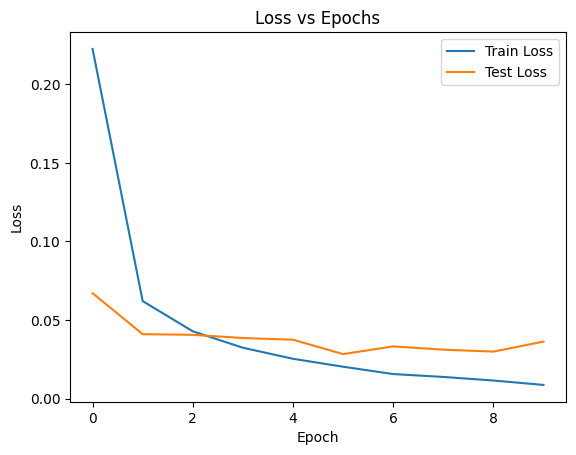

In [23]:
# Plot 1: Training & Test Loss
plt.plot(train_loss_list, label='Train Loss')
plt.plot(test_loss_list, label='Test Loss')
plt.title("Loss vs Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


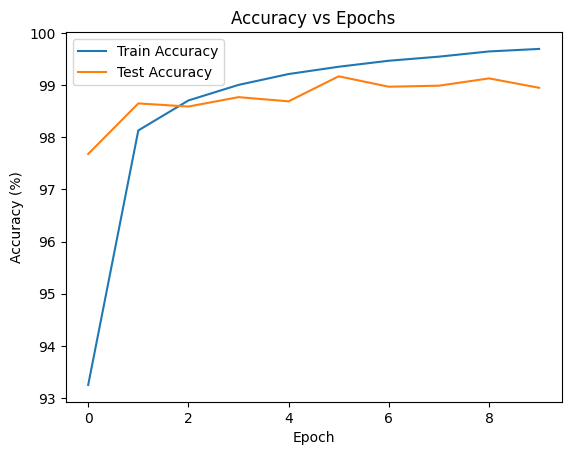

In [24]:
#Plot 2: Training and test accuracy vs. epochs
plt.plot(train_acc_list, label='Train Accuracy')
plt.plot(test_acc_list, label='Test Accuracy')
plt.title("Accuracy vs Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.show()


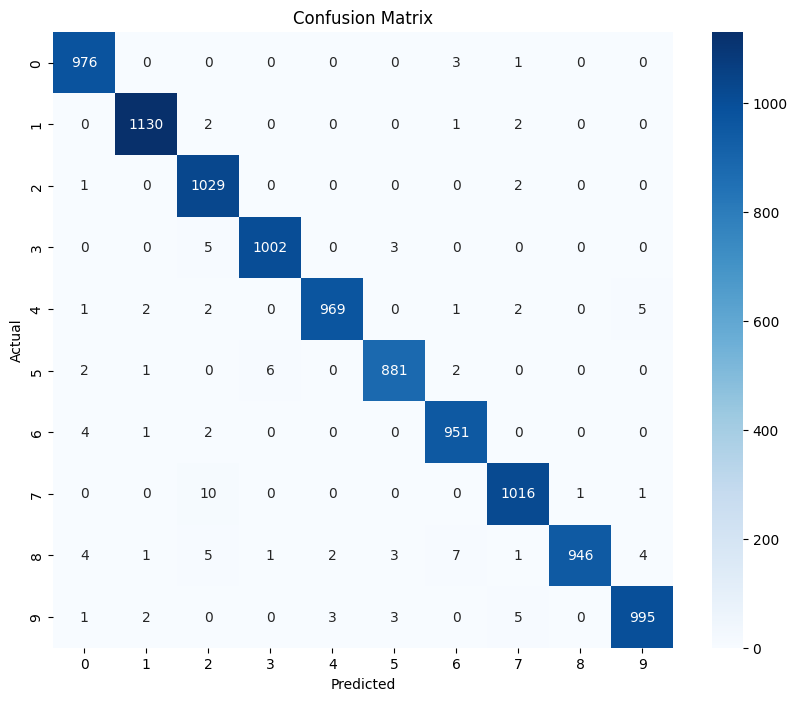

In [25]:
# Plot 3: Final confusion matrix (visualized as a heatmap with class labels)
# Collect predictions
all_preds = []
all_labels = []
model.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.numpy())
        all_labels.extend(labels.numpy())

cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
